In [4]:
import pandas as pd

# Load Excel file
df = pd.read_excel(r"C:\Users\91808\Downloads\Online retail.xlsx")  # Replace with your actual file path
df

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt
...,...
7495,"butter,light mayo,fresh bread"
7496,"burgers,frozen vegetables,eggs,french fries,ma..."
7497,chicken
7498,"escalope,green tea"


In [5]:
df.columns

Index(['shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil'], dtype='object')

In [7]:
df.shape

(7500, 1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                           --------------  ----- 
 0   shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil  7500 non-null   object
dtypes: object(1)
memory usage: 58.7+ KB


In [46]:
pip install mlxtend


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [52]:
# Convert comma-separated items into list of transactions 
transactions = []
for row in df.iloc[:, 0]:
    items = row.split(',')  # Split the string by comma
    transactions.append(items)


In [55]:
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

# Initialize and fit the encoder
te = TransactionEncoder()
te.fit(transactions)

# Transform and convert to DataFrame (step-by-step)
encoded_array = te.transform(transactions)
df_encoded = pd.DataFrame(data=encoded_array, columns=te.columns_)

In [56]:
from mlxtend.frequent_patterns import apriori, association_rules

# Define thresholds
support_values = [0.02, 0.03, 0.05, 0.07]
confidence_values = [0.2, 0.4, 0.6, 0.8]

# Store results
results = []

# Loop through combinations of support and confidence
for support in support_values:
    frequent_itemsets = apriori(df_encoded, min_support=support, use_colnames=True)
    
    for confidence in confidence_values:
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence)
        rules['support_level'] = support
        rules['confidence_level'] = confidence
        results.append(rules)

In [57]:
from mlxtend.frequent_patterns import apriori, association_rules

# Define lists to store the results
results = []

# Iterate through each combination of support and confidence
for support in support_values:
    freq_itemsets = apriori(df_encoded, min_support=support, use_colnames=True)
    
    for confidence in confidence_values:
        generated_rules = association_rules(freq_itemsets, metric="confidence", min_threshold=confidence)
        rule_count = generated_rules.shape[0]

        # Append result as a dictionary
        results.append(dict(
            support=support,
            confidence=confidence,
            n_rules=rule_count
        ))

        # Display progress
        print(f"→ Support: {support:.2f}, Confidence: {confidence:.2f} | Rules Found: {rule_count}")

→ Support: 0.02, Confidence: 0.20 | Rules Found: 125
→ Support: 0.02, Confidence: 0.40 | Rules Found: 11
→ Support: 0.02, Confidence: 0.60 | Rules Found: 0
→ Support: 0.02, Confidence: 0.80 | Rules Found: 0
→ Support: 0.03, Confidence: 0.20 | Rules Found: 57
→ Support: 0.03, Confidence: 0.40 | Rules Found: 4
→ Support: 0.03, Confidence: 0.60 | Rules Found: 0
→ Support: 0.03, Confidence: 0.80 | Rules Found: 0
→ Support: 0.05, Confidence: 0.20 | Rules Found: 18
→ Support: 0.05, Confidence: 0.40 | Rules Found: 2
→ Support: 0.05, Confidence: 0.60 | Rules Found: 0
→ Support: 0.05, Confidence: 0.80 | Rules Found: 0
→ Support: 0.07, Confidence: 0.20 | Rules Found: 6
→ Support: 0.07, Confidence: 0.40 | Rules Found: 0
→ Support: 0.07, Confidence: 0.60 | Rules Found: 0
→ Support: 0.07, Confidence: 0.80 | Rules Found: 0


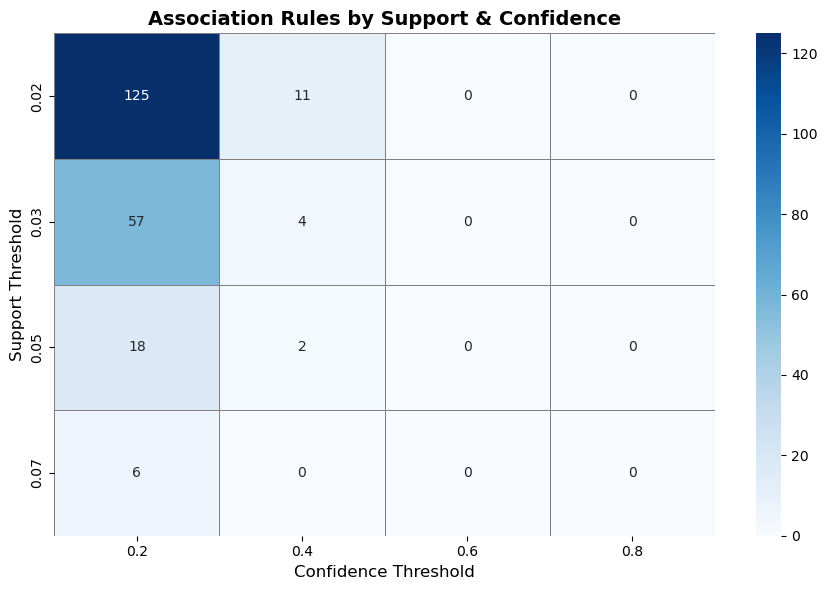

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert results to DataFrame if not already
results_df = pd.DataFrame(results)

# Pivot for heatmap
heatmap_data = results_df.pivot_table(index="support", columns="confidence", values="n_rules", aggfunc='first')

# Set up the plot
fig, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(heatmap_data,annot=True,fmt=".0f",cmap="Blues",linewidths=0.5,linecolor='gray',ax=ax)

# Customize plot
ax.set_title("Association Rules by Support & Confidence", fontsize=14, weight='bold')
ax.set_xlabel("Confidence Threshold", fontsize=12)
ax.set_ylabel("Support Threshold", fontsize=12)
plt.tight_layout()
plt.show()


In [59]:
from mlxtend.frequent_patterns import apriori, association_rules

# Parameters
selected_support = 0.02
selected_confidence = 0.4

# Generate frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=selected_support, use_colnames=True)

# Generate association rules
assoc_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=selected_confidence)

# Sort rules by lift (descending) and select top 10
top_rules = assoc_rules.sort_values("lift", ascending=False).iloc[:10]

# Display output
print(" Top 10 Association Rules Sorted by Lift:\n")
print(top_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].to_string(index=False))


 Top 10 Association Rules Sorted by Lift:

                 antecedents     consequents  support  confidence     lift
(ground beef, mineral water)     (spaghetti) 0.024734    0.421053 1.834131
               (ground beef)     (spaghetti) 0.055845    0.411095 1.790756
                      (soup) (mineral water) 0.033430    0.471390 1.572818
           (spaghetti, milk) (mineral water) 0.022609    0.451737 1.507248
           (milk, chocolate) (mineral water) 0.020097    0.448276 1.495698
    (ground beef, spaghetti) (mineral water) 0.024734    0.442907 1.477783
                 (olive oil) (mineral water) 0.038454    0.439294 1.465728
               (ground beef) (mineral water) 0.058744    0.432432 1.442835
      (spaghetti, chocolate) (mineral water) 0.022995    0.411765 1.373876
               (cooking oil) (mineral water) 0.028986    0.403226 1.345386
